# Практическое задание
## Урок 3. Классификация. Логистическая регрессия

#### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_logloss(y, y_pred, epsilon=1e-8):
    y = y.astype(np.float64)            # Привожу к типу вещественному,
    y_pred = y_pred.astype(np.float64)  # иначе ошибка в первом примере состоящем только из целых нудей и единиц
    
    y_pred[y_pred > 1 - epsilon] = 1 - epsilon  # Ограничим значения предсказанных значений интервалом [epsilon; 1 - epsilon]
    y_pred[y_pred < epsilon] = epsilon
    
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

Проверка:

In [3]:
y1      = np.array([1, 0, 0, 1])
y_pred1 = np.array([1, 0, 0, 1])
calc_logloss(y1, y_pred1)

1.0000000100247594e-08

In [4]:
y1 = np.array(     [ 1, 0,  0, 1])
y_pred1 = np.array([.9, 0, .1, 1])
calc_logloss(y1, y_pred1)

0.052680262828913194

#### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [5]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array( [0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [9]:
def eval_model(X, y, iterations=10000, alpha=1e-4, silent=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        if not silent:
            if i % (iterations / 10) == 0:
                print(i, W, err)
    return W, err

Посмотрим на значения log loss при разных alpha

In [10]:
for a in np.power(10, np.arange(-8, -1), dtype=np.float64):
    w, err = eval_model(X_st, y, alpha=a, silent=True)
    print(a, err, w)

1e-08 1.2198772782390879 [ 0.49667518 -0.13838259  0.6476866   1.52297221]
1e-07 1.2181827241996186 [ 0.49632455 -0.13944699  0.64766909  1.52245353]
1e-06 1.201296577757615 [ 0.49282758 -0.1500751   0.64748968  1.51727929]
1e-05 1.0393648355410017 [ 0.45886981 -0.25439705  0.6453131   1.46695998]
0.0001 0.5906743816929662 [ 0.25808924 -0.68189547  0.68834749  1.2411954 ]
0.001 0.5233563729128639 [-0.29756287 -0.72669083  1.06148576  1.39664388]
0.01 0.4058305387773311 [-2.77079473 -0.99580928  0.56650766  3.2676589 ]


Возьмем $\alpha = 0.1$. Число итераций 10 000.

А вообще с ростом числа итераций и $\alpha$, видим, что log loss уменьшается, но коэффициенты становятся огромными. Кажется, нужна регуляризация для избежания переобучения.

Посчитаем предсказания для выбранных нами параметров

In [11]:
w, err = eval_model(X_st, y, alpha=.1)

1000 [-2.77136565 -0.99588853  0.56641089  3.26813012] 0.40587815270727734
2000 [-4.59094777 -1.0359998  -0.13825631  4.44501211] 0.35333924193451927
3000 [-5.91004767 -1.08773886 -0.62127728  5.36155604] 0.32501347614925347
4000 [-6.96133333 -1.14371437 -0.98694403  6.13057114] 0.3066241878369146
5000 [-7.85498033 -1.19935714 -1.28748713  6.80564285] 0.2931244675498327
6000 [-8.64731257 -1.25347799 -1.54786532  7.41682354] 0.28239334043313835
7000 [-9.36966717 -1.30586395 -1.78130777  7.98193089] 0.27340382430941684
8000 [-10.04075209  -1.35657036  -1.99546097   8.51208184] 0.26560192980297875
9000 [-10.67239108  -1.40571631  -2.1950503    9.01453862] 0.2586628760279488
10000 [-11.27241705  -1.45342424  -2.38315559   9.49424167] 0.2523832489493557


In [12]:
z = np.dot(w, X_st)
y_pred = sigmoid(z)

In [13]:
y_pred

array([0.2896499 , 0.13238445, 0.99730871, 0.19963747, 0.73522164,
       0.28534702, 0.99936607, 0.08615041, 0.34268615, 0.99086395])

In [14]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [15]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [16]:
calc_pred_proba(w, X_st)

array([0.2896499 , 0.13238445, 0.99730871, 0.19963747, 0.73522164,
       0.28534702, 0.99936607, 0.08615041, 0.34268615, 0.99086395])

#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred(W, X, treshold=.5):
    z = np.dot(W, X)
    y_pred = sigmoid(z)

    y_pred = np.where(y_pred < treshold, 
                      np.zeros(y_pred.shape), 
                      np.ones(y_pred.shape))
    return y_pred

In [18]:
y_pred = calc_pred(w, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [19]:
calc_pred(w, X_st, treshold=.3)

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [20]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

#### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

|  <empty>   | $$y_{true} = 1$$ | $$y_{true} = 0$$ |
--- | --- | ---
| __$$y_{pred} = 1$$__  |   TP    |   FP   |
| __$$y_{pred} = 0$$__ |   FN    |   TN   |

In [21]:
def accuracy(y_true, y_pred):
    return np.count_nonzero(y_true == y_pred) / y_true.shape[0]

In [22]:
def confusion_matrix(y_true, y_pred):
    y_true = y_true.astype(np.int)
    y_pred = y_pred.astype(np.int)
    m = np.zeros((2, 2))
    for i in range(len(y_true)):
        m[1 - y_true[i]][1 - y_pred[i]] += 1
    return m

In [23]:
def precision(y_true, y_pred):
    m = confusion_matrix(y, y_pred)
    return m[0][0] / (m[0][0] + m[0][1])

In [24]:
def recall(y_true, y_pred):
    m = confusion_matrix(y, y_pred)
    return m[0][0] / (m[0][0] + m[1][0])

In [25]:
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r)

In [26]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [27]:
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [28]:
accuracy(y, y_pred)

0.9

In [29]:
confusion_matrix(y, y_pred)

array([[4., 1.],
       [0., 5.]])

In [30]:
precision(y, y_pred)

0.8

In [31]:
recall(y, y_pred)

1.0

In [32]:
f1_score(y, y_pred)

0.888888888888889

#### 6. Могла ли модель переобучиться? Почему?

Да, могла. 

С неконтролируемым ростом коэффициентов модели сигмоида как бы поощряет огромные значения <W, X>. Ведь они становятся ближе к 0 при стремлении к минус бесконечности и ближе к 1 при стремлении к + бесконечности. 

По крайней мере так на нашем примере. Ошибка log loss становится все меньше с ростом итераций и/или шага градиентого спуска. Коэффициенты модели становятся огромными. 

На новых тестовых значениях результаты скорее всего будут плохие

#### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

В строке изменения $W$ добавлено слагаемое $\lambda \cdot sign(W)$

In [57]:
def eval_model_l1(X, y, iterations=10000, alpha=1e-2, lambda_=1e-8, silent=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        
        if not silent:
            if i % (iterations / 10) == 0:
                print(i, W, err)
    return W, err

В строке изменения $W$ добавлено слагаемое $\lambda \cdot W$

In [58]:
def eval_model_l2(X, y, iterations=10000, alpha=1e-2, lambda_=1e-8, silent=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
        
        if not silent:
            if i % (iterations / 10) == 0:
                print(i, W, err)
    return W, err

In [59]:
eval_model(X_st, y, alpha=1e-1, iterations=10000)

1000 [-2.77136565 -0.99588853  0.56641089  3.26813012] 0.40587815270727734
2000 [-4.59094777 -1.0359998  -0.13825631  4.44501211] 0.35333924193451927
3000 [-5.91004767 -1.08773886 -0.62127728  5.36155604] 0.32501347614925347
4000 [-6.96133333 -1.14371437 -0.98694403  6.13057114] 0.3066241878369146
5000 [-7.85498033 -1.19935714 -1.28748713  6.80564285] 0.2931244675498327
6000 [-8.64731257 -1.25347799 -1.54786532  7.41682354] 0.28239334043313835
7000 [-9.36966717 -1.30586395 -1.78130777  7.98193089] 0.27340382430941684
8000 [-10.04075209  -1.35657036  -1.99546097   8.51208184] 0.26560192980297875
9000 [-10.67239108  -1.40571631  -2.1950503    9.01453862] 0.2586628760279488
10000 [-11.27241705  -1.45342424  -2.38315559   9.49424167] 0.2523832489493557


(array([-11.27241705,  -1.45342424,  -2.38315559,   9.49424167]),
 0.2523832489493557)

In [60]:
eval_model_l1(X_st, y, alpha=1e-1, iterations=10000, lambda_=1e-2)

1000 [-2.21463576 -0.83212551  0.48943945  2.68040717] 0.4300448634281734
2000 [-3.54724484e+00 -8.57934882e-01  4.53113452e-04  3.51541545e+00] 0.3849203027697603
3000 [-4.11762034e+00 -9.72184086e-01 -1.64413364e-03  4.04156077e+00] 0.36629130979363106
4000 [-4.42873329 -1.00417385 -0.07479456  4.28581034] 0.35801180782126574
5000 [-4.65803321 -1.01279537 -0.15793214  4.442434  ] 0.3523854269411276
6000 [-4.82733235 -1.01905664 -0.21971464  4.55832814] 0.3483889788284012
7000 [-4.95384328 -1.02396821 -0.26558645  4.64555455] 0.3454837564933041
8000 [-5.04929379 -1.02781326 -0.30001497  4.71173031] 0.3433363072158361
9000 [-5.12183241 -1.03081434 -0.32607718  4.76222883] 0.3417293366443895
10000 [-5.17726051 -1.03315282 -0.34593351  4.80093517] 0.3405157198360753


(array([-5.17726051, -1.03315282, -0.34593351,  4.80093517]),
 0.3405157198360753)

In [61]:
eval_model_l2(X_st, y, alpha=1e-1, iterations=10000, lambda_=1e-2)

1000 [-1.78579532 -0.79443213  0.61526054  2.35678038] 0.4490063617735502
2000 [-2.18251065 -0.79352797  0.4495364   2.58915584] 0.4334305176646572
3000 [-2.27071264 -0.79348832  0.41286347  2.64129536] 0.4301167889867485
4000 [-2.29045598 -0.79350402  0.40469305  2.65301689] 0.4293814090419029
5000 [-2.29488288 -0.79350888  0.40286318  2.65564783] 0.429216832888489
6000 [-2.29587588 -0.79351004  0.40245284  2.65623812] 0.4291799325570523
7000 [-2.29609864 -0.7935103   0.40236079  2.65637054] 0.4291716555252824
8000 [-2.29614861 -0.79351036  0.40234014  2.65640025] 0.4291697987490207
9000 [-2.29615982 -0.79351037  0.40233551  2.65640691] 0.42916938221197165
10000 [-2.29616234 -0.79351037  0.40233447  2.65640841] 0.4291692887683336


(array([-2.29616234, -0.79351037,  0.40233447,  2.65640841]),
 0.4291692887683336)

#### Посмотрим как ведут себя коэффициенты нашей модели при увеличении коэффициента L2-регуляризации

In [83]:
lambdas = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1]

In [84]:
W_list = []
for lmbd in lambdas:
    W, _ = eval_model_l2(X_st, y, iterations=10000, alpha=1e-1, lambda_=lmbd, silent=True)
    W_list.append(W)

In [85]:
W_list = np.array(W_list).T
W_list

array([[-11.21726959, -11.10834531, -10.74111235,  -9.80265118,
         -7.50115902,  -4.71531229,  -2.29616234,  -0.95776381,
         -0.29487658,  -0.08229285,  -0.01655201],
       [ -1.44881774,  -1.43973395,  -1.40926034,  -1.33261594,
         -1.15533653,  -0.96859569,  -0.79351037,  -0.58639062,
         -0.32101627,  -0.14112767,  -0.04390904],
       [ -2.3662302 ,  -2.33277905,  -2.21978834,  -1.92944063,
         -1.20575075,  -0.31024228,   0.40233447,   0.57998876,
          0.37699308,   0.16325541,   0.05143479],
       [  9.44974943,   9.36190714,   9.06613496,   8.31357404,
          6.50028423,   4.4107918 ,   2.65640841,   1.54110333,
          0.73686593,   0.32284866,   0.1158909 ]])

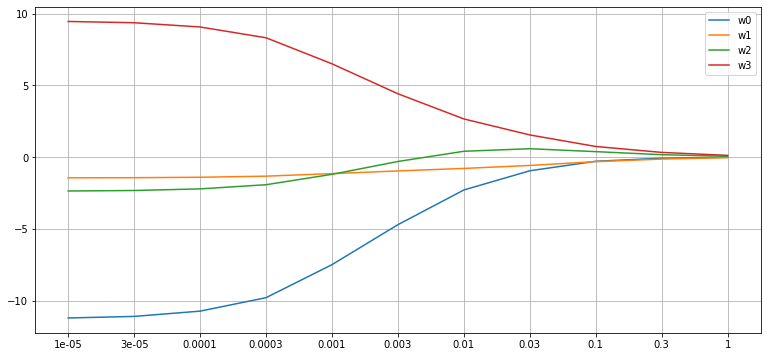

In [86]:
plt.figure(figsize=(13, 6))

x = np.arange(len(lambdas))
for i, w in enumerate(W_list):
    plt.plot(x, w, label='w'+str(i))
    
plt.setp(plt.legend(loc='upper right').get_texts(), color='black')
plt.grid()    
plt.xticks(x, lambdas)

plt.show()